In [133]:
import itertools
from sklearn import metrics
from sklearn.calibration import LabelEncoder
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.losses import MeanSquaredError
# from tensorflow.python.keras.metrics import RootMeanSquaredError
# from tensorflow.python.keras.layers import Dense, Dropout
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [134]:
df.shape

(5110, 12)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [136]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [137]:
df.describe()
## %

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [138]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [139]:
df = df.dropna()

In [140]:
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
               'work_type', 'Residence_type', 'smoking_status']

numerical = ['age','avg_glucose_level', 'bmi']

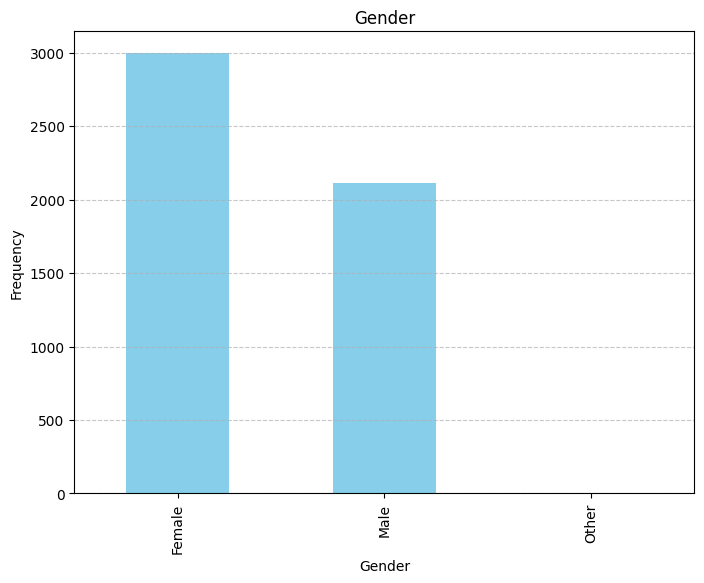

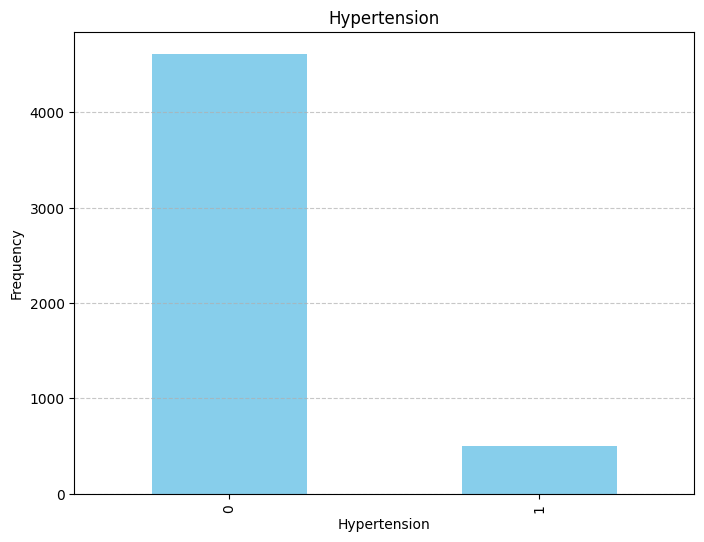

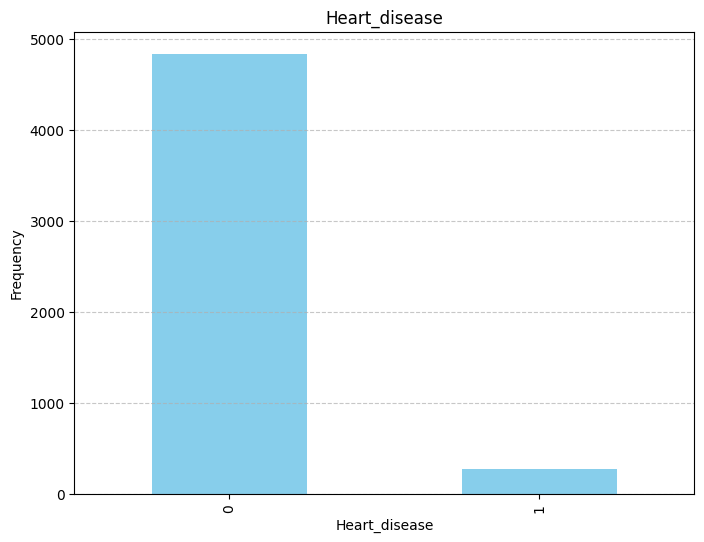

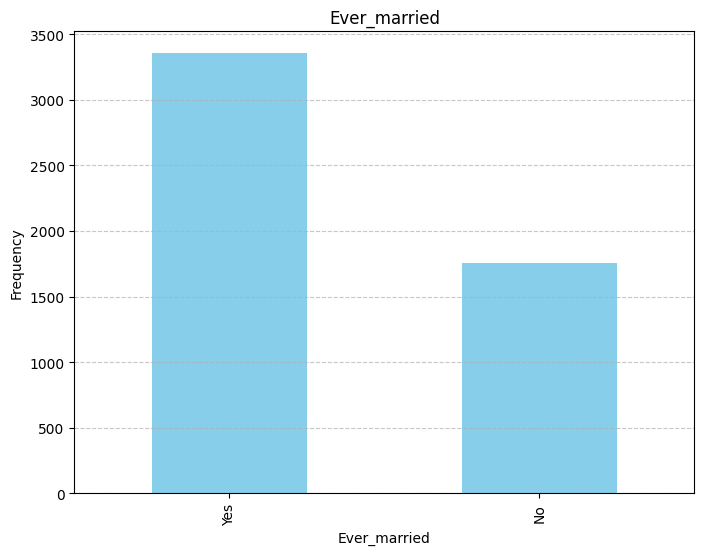

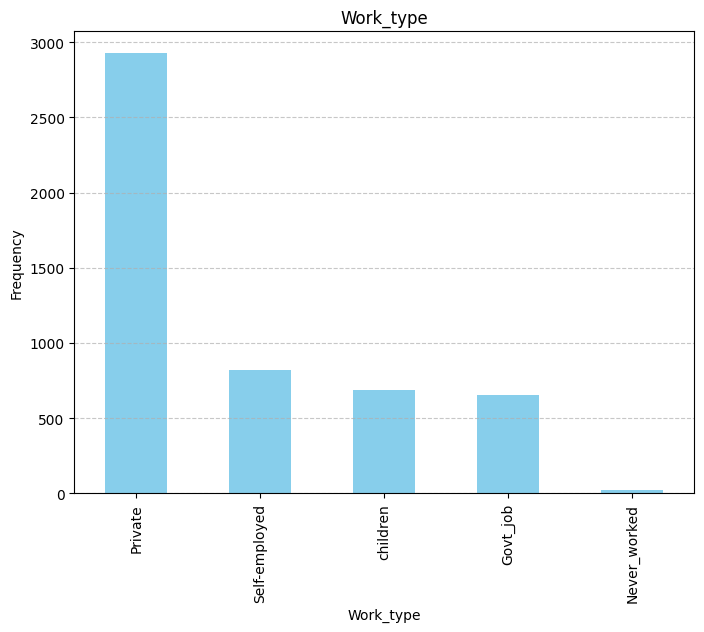

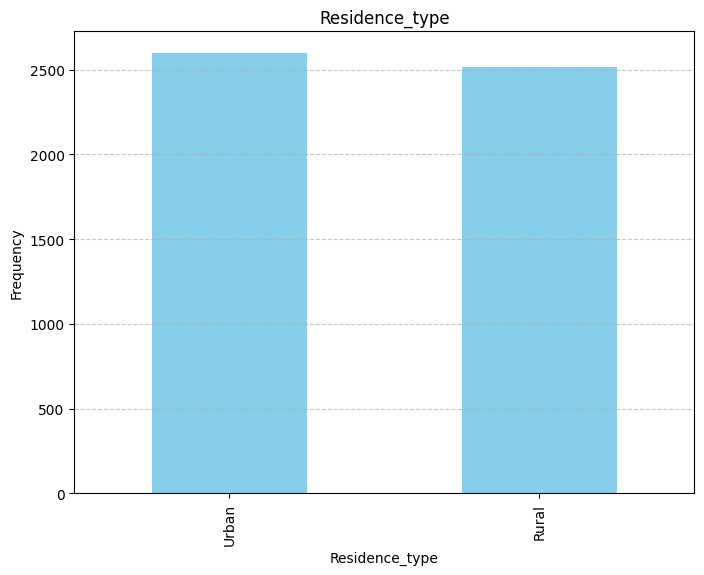

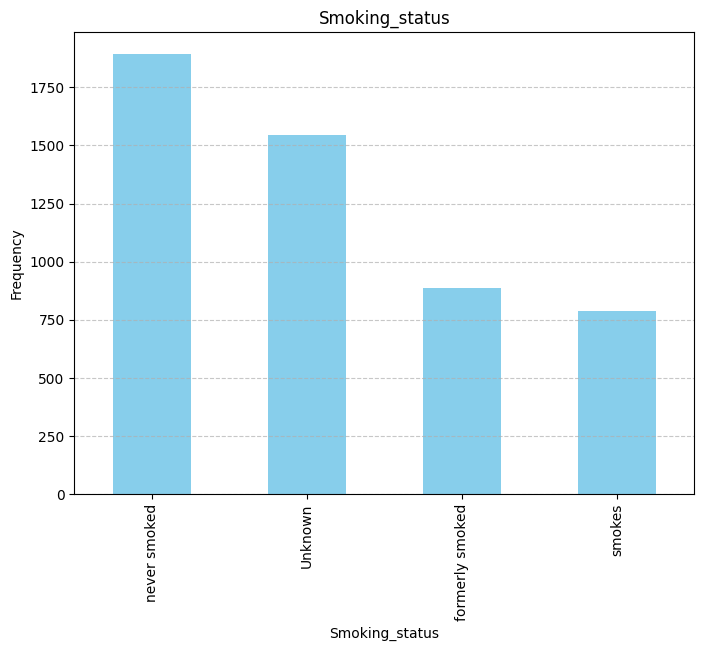

In [141]:
for column in categorical:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(column.capitalize())
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

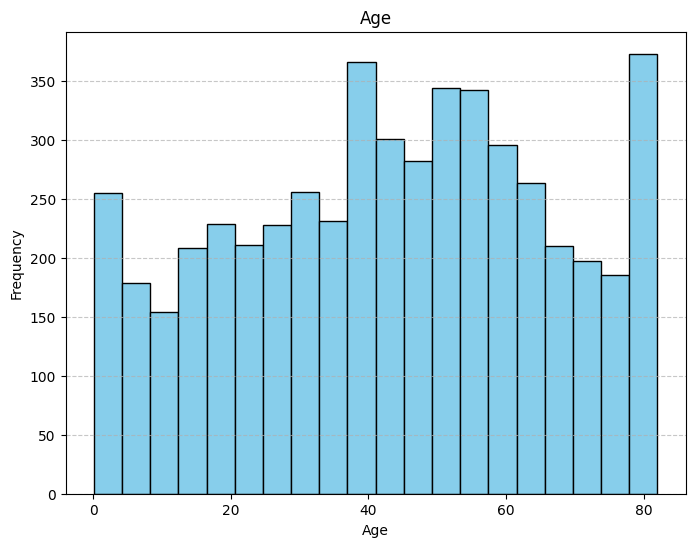

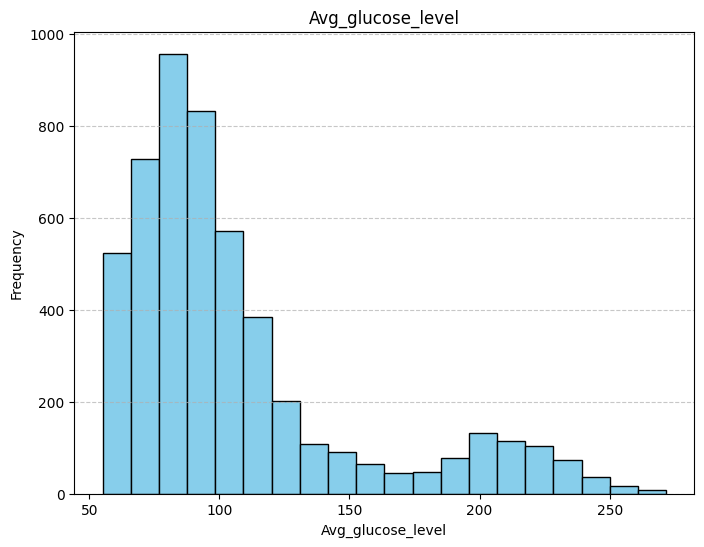

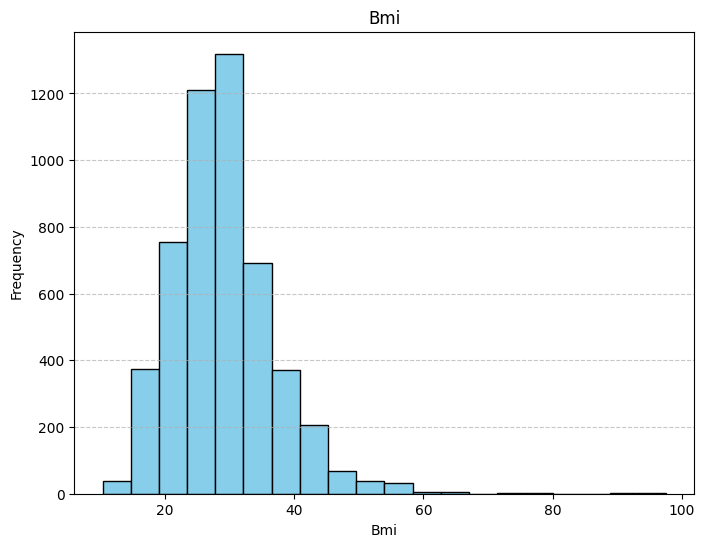

In [142]:
for column in numerical:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(column.capitalize())
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

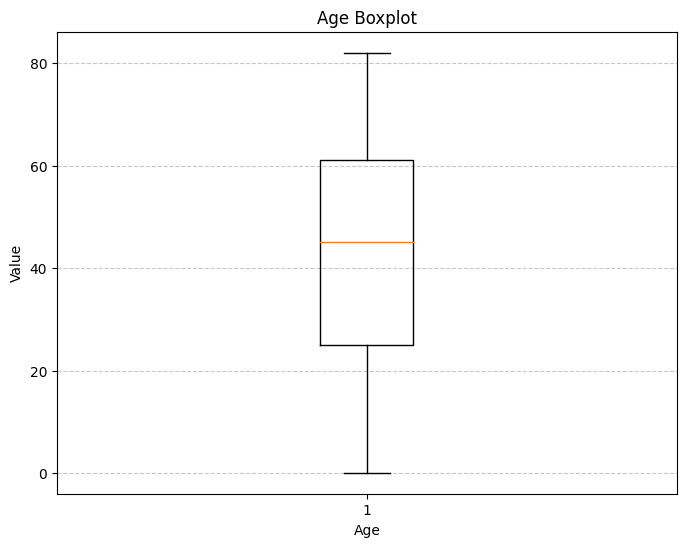

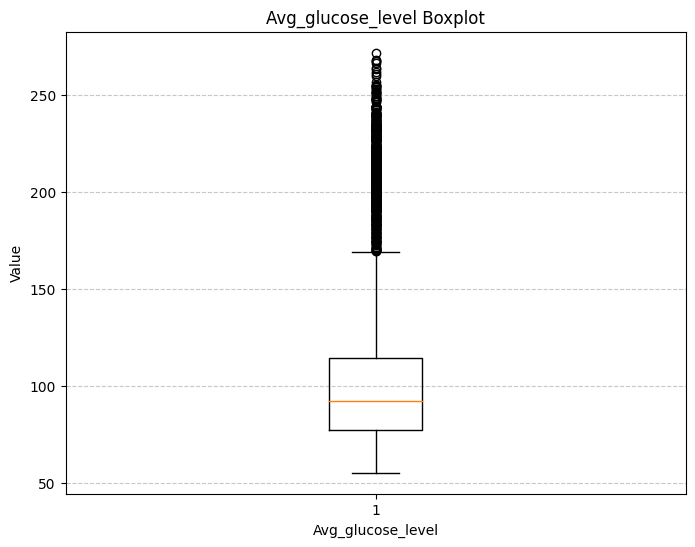

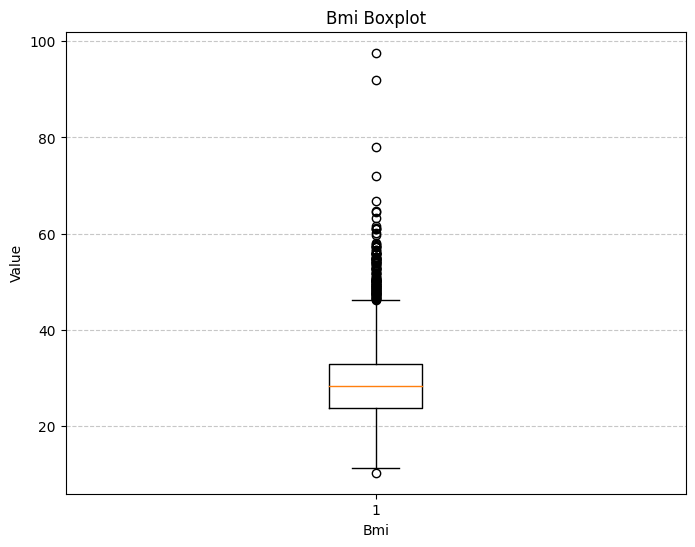

In [143]:
for column in numerical:
    plt.figure(figsize=(8, 6))
    
    plt.boxplot(df[column])
    
    plt.title(f"{column.capitalize()} Boxplot")
    plt.xlabel(column.capitalize())
    plt.ylabel('Value')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [144]:
df = df[df['gender'] != 'Other']
df_encoded = pd.get_dummies(df, columns=['smoking_status', 'work_type'])
label_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type']
label_encoder = LabelEncoder()
for column in label_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])
df_encoded.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,1,67.0,0,1,1,1,228.69,36.600000,1,False,True,False,False,False,False,True,False,False
1,51676,0,61.0,0,0,1,0,202.21,28.893237,1,False,False,True,False,False,False,False,True,False
2,31112,1,80.0,0,1,1,0,105.92,32.500000,1,False,False,True,False,False,False,True,False,False
3,60182,0,49.0,0,0,1,1,171.23,34.400000,1,False,False,False,True,False,False,True,False,False
4,1665,0,79.0,1,0,1,0,174.12,24.000000,1,False,False,True,False,False,False,False,True,False
5,56669,1,81.0,0,0,1,1,186.21,29.000000,1,False,True,False,False,False,False,True,False,False
6,53882,1,74.0,1,1,1,0,70.09,27.400000,1,False,False,True,False,False,False,True,False,False
7,10434,0,69.0,0,0,0,1,94.39,22.800000,1,False,False,True,False,False,False,True,False,False
8,27419,0,59.0,0,0,1,0,76.15,28.893237,1,True,False,False,False,False,False,True,False,False
9,60491,0,78.0,0,0,1,1,58.57,24.200000,1,True,False,False,False,False,False,True,False,False


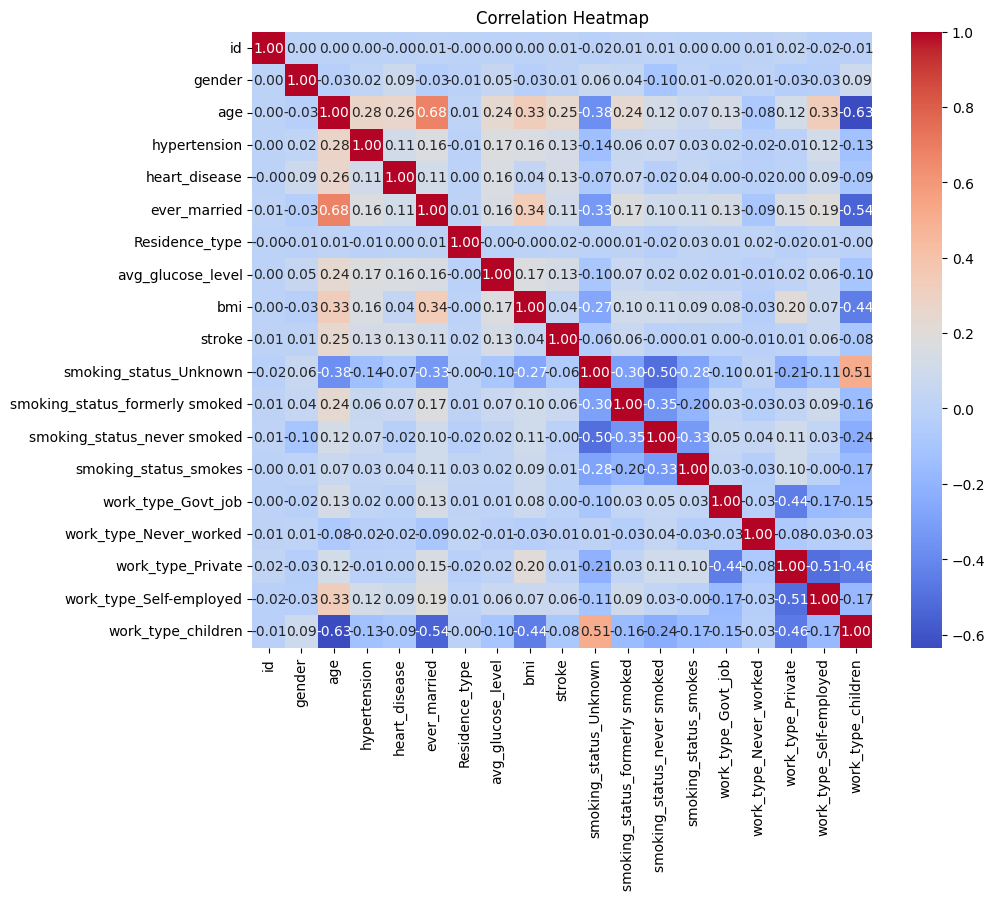

In [145]:
corr_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [146]:
X = df_encoded.drop('stroke', axis = 1)
y = df_encoded['stroke']

In [147]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


X_train,X_test,y_train,y_test  = train_test_split(X_scaled,
                                              y,
                                              test_size=0.2,
                                              stratify = y,
                                              random_state = 42)

In [148]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [149]:
all_results = pd.DataFrame(columns=['Model', 'Epochs', 'Optimizer', 'Accuracy', 'Loss'])
def plot_loss(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.legend()
    plt.show()

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


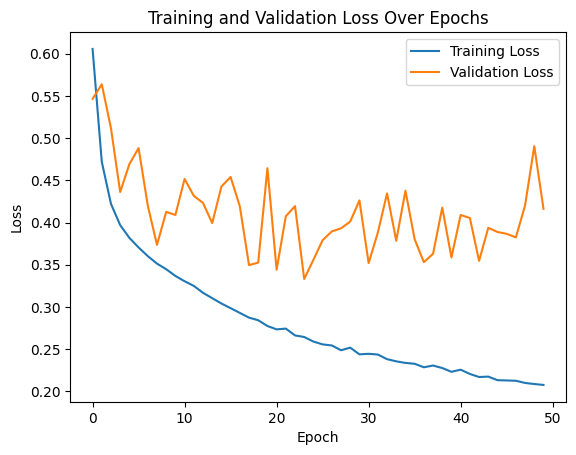

In [150]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(18,), activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

all_results.loc[len(all_results)] =  ['Dense(32)', 50,  'Adam(0.001)', history.history['val_accuracy'][-1], history.history['val_loss'][-1]]
# _, accuracy = model.evaluate(X_test, y_test)
# print('Accuracy: %.2f' % (accuracy*100))
plot_loss(history)

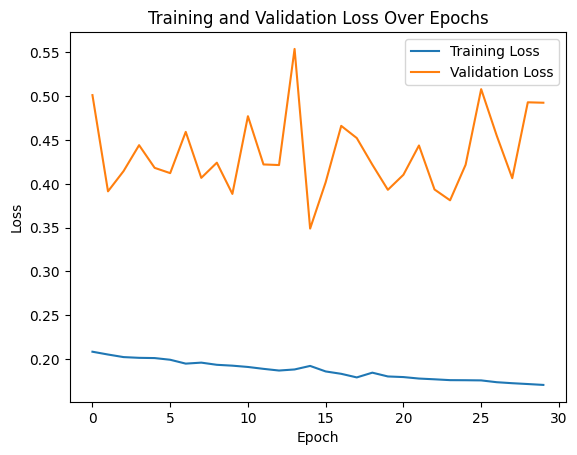

In [151]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)
plot_loss(history)

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


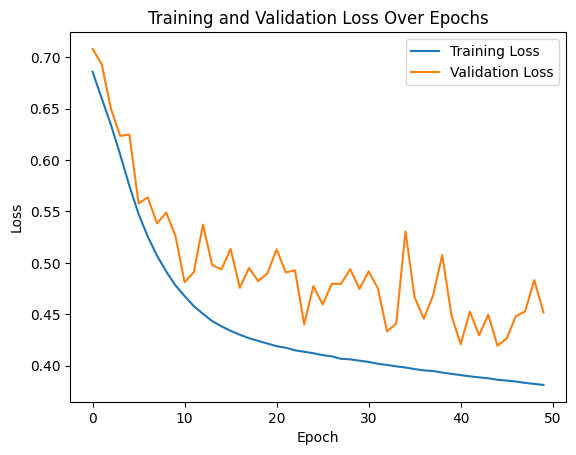

In [152]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(18,), activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
all_results.loc[len(all_results)] = ['Dense(32)',50 ,'SGD' ,history.history['val_accuracy'][-1], history.history['val_loss'][-1]]

plot_loss(history)

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


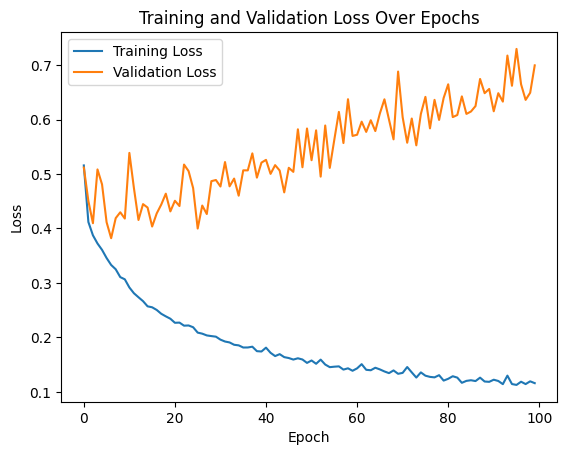

In [153]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(18,), activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.003), metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

all_results.loc[len(all_results)] = ['Dense(32)',50 ,'Adam(0.003)' ,history.history['val_accuracy'][-1], history.history['val_loss'][-1]]

# _, accuracy = model.evaluate(X_test, y_test)
# print('Accuracy: %.2f' % (accuracy*100))
plot_loss(history)

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


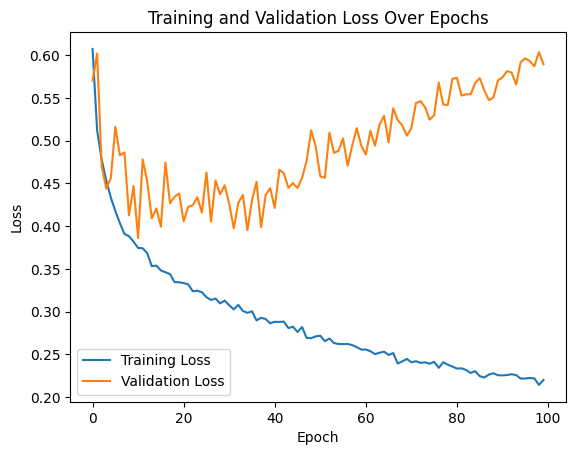

In [154]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(18,), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)
all_results.loc[len(all_results)] = ['Dense(32)+1Dropout(0.2)', 100, 'Adam(0.001)', history.history['val_accuracy'][-1], history.history['val_loss'][-1]]

plot_loss(history)

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


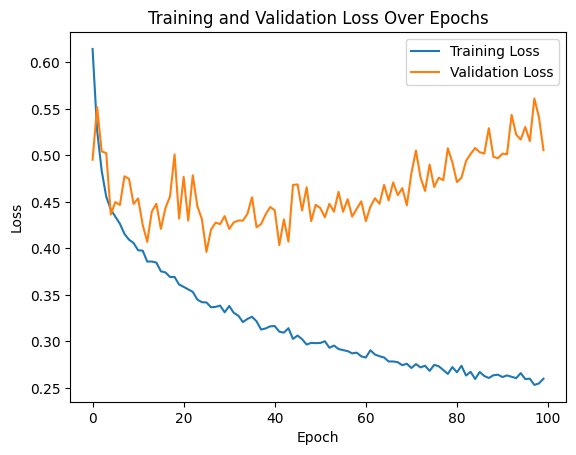

In [155]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(18,), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)
all_results.loc[len(all_results)] = ['Dense(32)+2Dropout(0.2)', 100, 'Adam(0.001)', history.history['val_accuracy'][-1], history.history['val_loss'][-1]]

plot_loss(history)

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


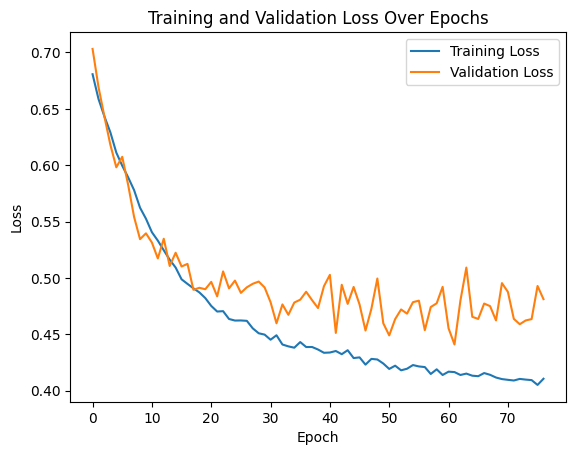

In [156]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(18,), activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=350, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)

all_results.loc[len(all_results)] = ['Dense(32)+2Dropout(0.2) + es', 350, 'SGD(0.01)', history.history['val_accuracy'][-1], history.history['val_loss'][-1]]

plot_loss(history)

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


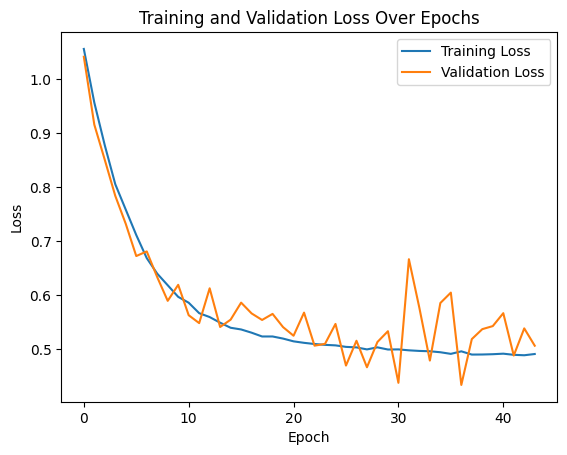

In [157]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(18,), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.02), metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=350, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)

all_results.loc[len(all_results)] = ['Dense(32)+2Dropout(0.2)+es+l2', 350, 'SGD(0.02)', history.history['val_accuracy'][-1], history.history['val_loss'][-1]]

plot_loss(history)

c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


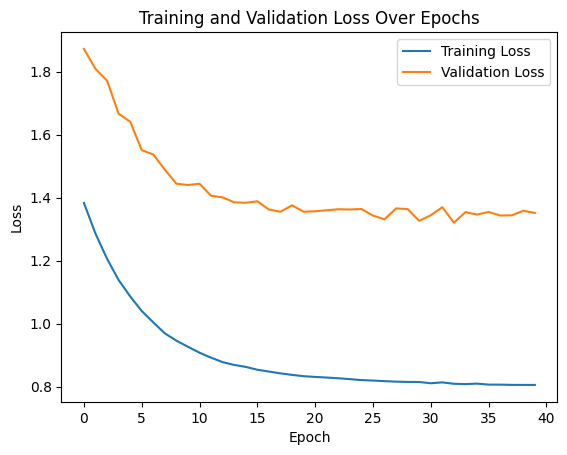

In [158]:
def dice_coefficient(y_true, y_pred, smooth=1):
    intersection = tf.keras.backend.sum(tf.keras.backend.abs(y_true * y_pred), axis=-1)
    return (2. * intersection + smooth) / (tf.keras.backend.sum(tf.keras.backend.square(y_true), -1) + tf.keras.backend.sum(tf.keras.backend.square(y_pred), -1) + smooth)

def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

def custom_loss(y_true, y_pred):
    loss = tf.reduce_mean(tf.square(y_true - y_pred)) 
    return loss


def custom_binary_crossentropy(y_true, y_pred):
    class_weights = tf.constant([0.1, 0.9], dtype=tf.float32)
    y_true = tf.cast(y_true, tf.float32)
    weights = tf.gather(class_weights, tf.cast(y_true, tf.int32))
    loss = tf.reduce_mean(tf.nn.weighted_cross_entropy_with_logits(labels=y_true, logits=y_pred, pos_weight=weights))
    
    return loss

def custom_hinge_loss(y_true, y_pred, margin=1):
    y_true_mapped = (2 * y_true) - 1
    loss = tf.keras.backend.maximum(0.0, margin - y_true_mapped * y_pred)
    return tf.keras.backend.mean(loss)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(18,), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss=custom_hinge_loss, optimizer=tf.optimizers.SGD(learning_rate=0.02), metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=350, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)

plot_loss(history)

In [159]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.6998 - loss: 1.3311
Accuracy: 70.16


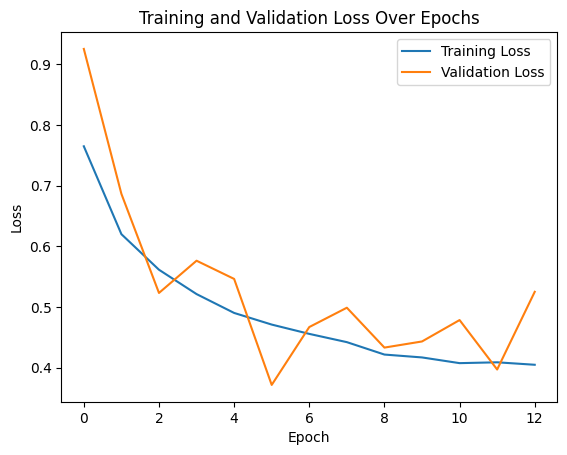

In [160]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(18,), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(16, activation='relu',))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.SGD(learning_rate=0.02), metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=350, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)

plot_loss(history)

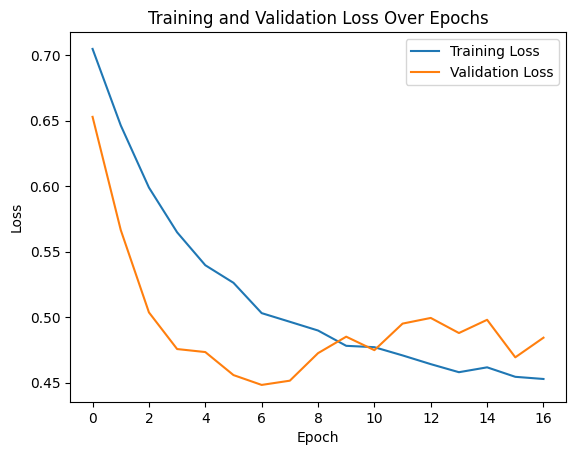

In [161]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2048, input_shape=(18,), activation='selu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2048, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1024, activation='selu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(256, activation='selu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='selu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(4e-5), metrics = [tf.keras.metrics.AUC(num_thresholds=700000,curve='ROC'), 'accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=350, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)
all_results.loc[len(all_results)] = ['LModel', 350, 'Adam(4e-5)', history.history['val_accuracy'][-1], history.history['val_loss'][-1]]

plot_loss(history)

In [162]:
all_results

,Model,Epochs,Optimizer,Accuracy,Loss
0,Dense(32),50,Adam(0.001),0.852251,0.416215
1,Dense(32),50,SGD,0.767123,0.451851
2,Dense(32),50,Adam(0.003),0.870842,0.699468
3,Dense(32)+1Dropout(0.2),100,Adam(0.001),0.847358,0.589606
4,Dense(32)+2Dropout(0.2),100,Adam(0.001),0.813112,0.505670
5,Dense(32)+2Dropout(0.2) + es,350,SGD(0.01),0.712329,0.481148
6,Dense(32)+2Dropout(0.2)+es+l2,350,SGD(0.02),0.739726,0.506773
7,LModel,350,Adam(4e-5),0.681018,0.484246


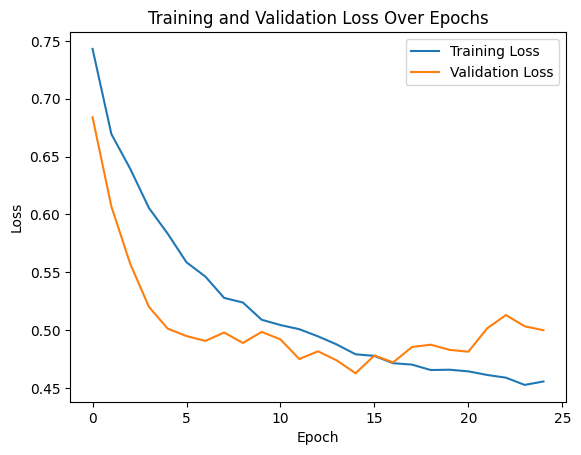

In [166]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(2048, input_shape=(18,), activation='selu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2048, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1024, activation='selu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(256, activation='selu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='selu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(4e-5), metrics = [tf.keras.metrics.AUC(num_thresholds=700000,curve='ROC')])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=350, batch_size=256, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)
all_results.loc[len(all_results)] = ['LModel', 350, 'Adam(4e-5)', 0, history.history['val_loss'][-1]]

plot_loss(history)

In [167]:
all_results

,Model,Epochs,Optimizer,Accuracy,Loss
0,Dense(32),50,Adam(0.001),0.852251,0.416215
1,Dense(32),50,SGD,0.767123,0.451851
2,Dense(32),50,Adam(0.003),0.870842,0.699468
3,Dense(32)+1Dropout(0.2),100,Adam(0.001),0.847358,0.589606
4,Dense(32)+2Dropout(0.2),100,Adam(0.001),0.813112,0.505670
5,Dense(32)+2Dropout(0.2) + es,350,SGD(0.01),0.712329,0.481148
6,Dense(32)+2Dropout(0.2)+es+l2,350,SGD(0.02),0.739726,0.506773
7,LModel,350,Adam(4e-5),0.681018,0.484246
8,LModel,350,Adam(4e-5),0.000000,0.500023
